# Strongest Pokemon Insights 
### Cahyarini (Crystal) Hariga

In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, precision_recall_curve, auc


# Removing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading data
df = pd.read_csv("pokemon.csv")
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


## Which Pokemon type with the strongest battlers & defenders? Why?
To tackle this question, I mainly chose to analyze the stats of  Pokemon, since I assumed that these are the metrics that determine a Pokemon's strength in battles. 
Thus below, I aggregated the stats data by primary types to calculate the primary types' mean for each stats before exploring the results.

Text(0, 0.5, 'Total')

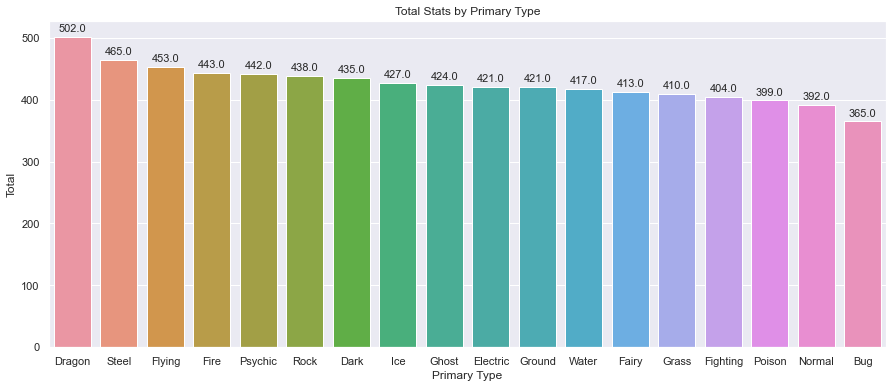

In [68]:
# Visualizing data by Type_1

## Plot Template
sns.set_style("whitegrid") # theme
sns.set_palette("Pastel1") # color palette
sns.set(font_scale =1) # font size
 

## Prepping Stats to be aggregated by Types
df_type1 = df.groupby(["Type_1"]).agg(Total = ("Total", "mean"), HP = ("HP", "mean"),
                                                      Attack = ("Attack", "mean"), Defense = ("Defense", "mean"),
                                                      Sp_Atk = ("Sp_Atk", "mean"), Sp_Def = ("Sp_Def", "mean"),
                                                      Speed = ("Speed", "mean")).round()
df_type1 = df_type1.reset_index()
df_type1[["Total", "HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed"]] = df_type1[["Total", "HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed"]].astype(int)
df_type1

## Total Stats
df_type1 = df_type1.sort_values(by = ["Total"], ascending = False)
tstats = sns.barplot(x='Type_1', y='Total', data = df_type1)

# Creating annotations for each bar
for bar in tstats.patches:
    tstats.annotate(format(bar.get_height(),),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()),
                   ha='center', va='center',
                   size=11,
                   xytext=(0, 8),
                   textcoords='offset points')

# Set the size of the figure
tstats = sns.set(rc={'figure.figsize':(15,6)})
plt.title("Total Stats by Primary Type")
plt.xlabel('Primary Type')
plt.ylabel('Total')
# Rotating x axis labels
# plt.xticks(rotation = 0) 


Insights from graph above:
* Dragon, Steel, Flying are the top 3 Types with the highest average total stats
* Lowest is Bug

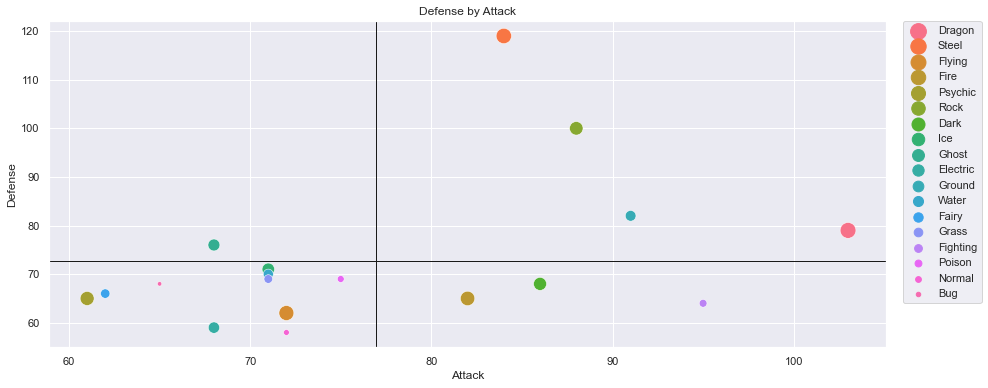

In [59]:
## Defense by Attack Scatterplot
### x = Attack
### y = Defense
### color = Primary Type
## size = Total Stats order
stats = sns.scatterplot(data=df_type1, x='Attack', y='Defense', hue='Type_1', size = "Type_1",
                        sizes=(20, 250), legend = "full")
# Changing Legend position
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Defense by Attack")

# Displaying quadrants for ease of analysis based on the mean 
plt.axhline(y=df_type1['Defense'].mean(), color='k', linestyle='-', linewidth=1)           
plt.axvline(x=df_type1['Attack'].mean(), color='k',linestyle='-', linewidth=1) 

Focusing on the Top 5 from the previous chart.
Insights from graph above:
* Dragon is in the __upper right quadrant__ (highest attack, 4th on Defense)
* Steel is in the __upper right quadrant__ (highest defense, 5th on Attack)
* Flying is in the bottom left quadrant (low attack, low defense)
* Fire is in the bottom right (low defense, higher attack)
* Psychic is in the bottom left quadrant (lowest attack, low defense)

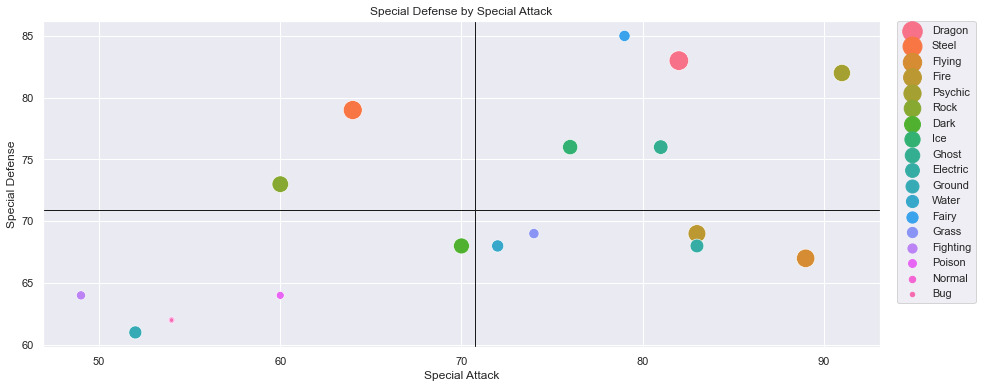

In [64]:
## Special Defense by Special Attack Scatterplot
### x = Special Attack
### y = Special Defense
### color = Primary Type
## size = Total Stats order
statsp = sns.scatterplot(data=df_type1, x='Sp_Atk', y='Sp_Def', hue='Type_1', size = "Type_1",
                        sizes=(20, 380), legend = "full")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Special Defense by Special Attack")
plt.xlabel("Special Attack")
plt.ylabel("Special Defense")

# Displaying quadrants for ease of analysis based on the mean 
plt.axhline(y=df_type1['Sp_Def'].mean(), color='k', linestyle='-', linewidth=1)           
plt.axvline(x=df_type1['Sp_Atk'].mean(), color='k',linestyle='-', linewidth=1) 

Insights from graph above:
* Dragon is in the __upper right quadrant__
* Steel in the upper left quadrant (low Sp. Attack)
* Flying in the lower right quadrant (high Sp. Attack, low Sp. Defense) 
* Fire is also in the lower right quadrant (behind Flying in Sp. Attack, but higher for Sp. Defense)
* Psychic: __upper right quadrant__ (highest Sp. Attack, third Sp. Def)
Only looking at Top 5 from total stats

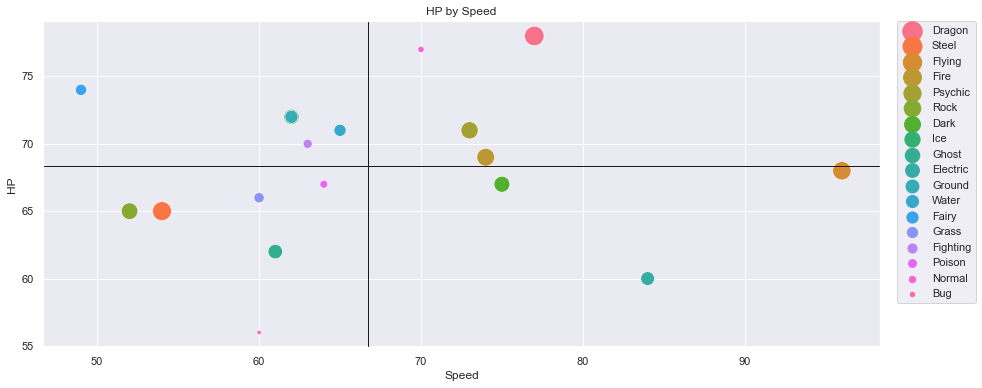

In [65]:
## HP by Speed Scatterplot
### x = Speed
### y = HP
### color = Primary Type
## size = Total Stats order
stathp = sns.scatterplot(data=df_type1, x='Speed', y='HP', hue='Type_1', size = "Type_1",
                        sizes=(20, 380), legend = "full")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("HP by Speed")

# Displaying quadrants for ease of analysis based on the mean 
plt.axhline(y=df_type1['HP'].mean(), color='k', linestyle='-', linewidth=1)           
plt.axvline(x=df_type1['Speed'].mean(), color='k',linestyle='-', linewidth=1) 

Insights from graph above:
* Dragon is in the __upper right quadrant__ (highest HP, third in speed)
* Steel is in the bottom left quadrant (mid HP, low speed)
* Flying is in the right quadrant (mid HP, high speed)
* Fire is in the upper center quadrant (higher HP, mid speed)
* Psychic is in the upper center quadrant (higher HP than Fire, mid speed)

If I had to only pick one Pokemon Type, I would choose to collect only Dragon type Pokemon because it has the best overall stats based on the insights from the previous charts:
* Dragon ranks the highest in average Total stats, with 502, compared to other Types
* Dragon consistently places in the right quadrant for average stats of all 3 categories: Attack vs. Defense, Sp. Attack vs. Sp. Defense, HP vs. Speed (as bolded)
        
## How can we predict whether a newly encountered Pokemon is a Legendary Pokemon?
I would choose Logistic Regression, since I value consistent (high bias, lower variance) predictions to reduce number of Master Balls wasted to catch Legendary Pokemon.

In [62]:
# Data Preprocessing
## check for data types
df.dtypes


## Handle Null Values
df.isnull().sum(axis = 0)
# Noticed that there are several null values in Type_2 (371), Pr_Male (77), Egg_Group_2 (530)
# Hence, I will transform Type_2 and Egg_Group_2 into a general binary variable that indicates the presence of a second type/group
df["hasType2"] = df["Type_2"].notnull().astype('int')
df["hasEgg2"] = df["Egg_Group_2"].notnull().astype('int')
df1 = df.drop(['Type_2', 'Egg_Group_2'], axis=1)
df1.head()
# Checked descriptive statistics of Pr_Male 
df["Pr_Male"].describe()
# Based on the descriptive statistics, the 25%, 50%, 75% is 0.5, thus I will impute the missing values with 0.5 
df1["Pr_Male"] = df["Pr_Male"].replace(np.nan, 0.5)


## Check distribution of the data first
#hist = df1.hist()
# Numerical data needs to be standardized


## Encoding Variables
df1["hasGender"] = df1["hasGender"].astype('int')
df1["hasMegaEvolution"] = df1["hasMegaEvolution"].astype('int')
df1["isLegendary"] = df1["isLegendary"].astype('int')
df1["Body_Style"] = df1["Body_Style"].astype('category')
df1["Body_Style_cat"] = df1["Body_Style"].cat.codes
## Using 
oencoder = OrdinalEncoder()
df1.dtypes
df1["Type_1_num"] = oencoder.fit_transform(df1[["Type_1"]]).astype("int")
df1["Color_num"] = oencoder.fit_transform(df1[["Color"]]).astype("int")
df1["Egg_Group_1_num"] = oencoder.fit_transform(df1[["Egg_Group_1"]]).astype("int")
df1.dtypes
# Dropped non numerical variables, Catch_Rate (target leakage with isLegendary (reflects rarity)),
# Pokemon Number: just an index, Pokemon Name: distinct values; Total: to avoid multicollinearity with other stats
# Using raw stats instead of Total to understand how important is each stat in predicting whether a Pokemon is legendary
df2 = df1.drop(['Type_1', 'Color', 'Egg_Group_1', 'Body_Style', 'Catch_Rate', 'Number', 'Name', 'Total'], axis=1)

# ## Splitting X and Y variables
y = df2["isLegendary"]
x = df2.drop(["isLegendary"], axis = 1)


## Standardizing numerical predictors
x_scale = x.drop(["Generation", "hasGender", "hasMegaEvolution", "hasType2", "hasEgg2", "Body_Style_cat", "Type_1_num", "Color_num", "Egg_Group_1_num"], axis=1)
scaled_features = StandardScaler().fit_transform(x_scale.values)
x_scaled = pd.DataFrame(scaled_features, index=x_scale.index, columns=x_scale.columns)
x_scaled[["Generation", "hasGender", "hasMegaEvolution", "hasType2", "hasEgg2", "Body_Style_cat", "Type_1_num", "Color_num", "Egg_Group_1_num"]] = x[["Generation", "hasGender", "hasMegaEvolution", "hasType2", "hasEgg2", "Body_Style_cat", "Type_1_num", "Color_num", "Egg_Group_1_num"]]

## Split into Training & Testing set
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=30)


In [66]:
# Model Building
## Using Recursive Feature Elimination (a type of backward elimination) to reduce features by half
## In order to prevent overfitting
logr = LogisticRegression()
# Trial and error to find optimal cross-validation splits to reduce features
# Cross-Validation 200 times to determine optimal features
cv = StratifiedKFold(n_splits = 200, random_state = 5, shuffle = True)
rfecv = RFECV(logr, step = 1, cv = cv)
logr1 = rfecv.fit(x_train, y_train)

rank = pd.DataFrame(logr1.ranking_)
# rank # show ranking of features based on importance
sup = pd.DataFrame(logr1.support_)
# sup # show which variables are included in the model
# Include feature names
names = pd.DataFrame(x_train.columns)
rank1 = pd.concat([names, rank], axis = 1)
rank1.columns = ["Feature", "Rank"]
rank1

,Feature,Rank
0,HP,2
1,Attack,1
2,Defense,1
3,Sp_Atk,1
4,Sp_Def,1
5,Speed,1
6,Pr_Male,1
7,Height_m,1
8,Weight_kg,3
9,Generation,1


In [ ]:
# Filtered out the lesser important features
most_important = rank1.loc[rank1["Rank"]==1]
print(most_important)
print("Number of Features: ", len(most_important))

             Feature  Rank
1             Attack     1
2            Defense     1
3             Sp_Atk     1
4             Sp_Def     1
5              Speed     1
6            Pr_Male     1
7           Height_m     1
9          type_rank     1
10        Generation     1
11         hasGender     1
12  hasMegaEvolution     1
13          hasType2     1
14           hasEgg2     1
15    Body_Style_cat     1
16        Type_1_num     1
18   Egg_Group_1_num     1
Number of Features:  16


Based on feature selection of 200 CV, we removed 3 variables: Color, Weight, HP which has been determined to be less important based on the RFE method which looks at accuracy score. Since this does not seem to be a proper method we can address this in the future.

We are now left with 15 number of features (as seen above) that are important variables to predict whether a Pokemon is legendary. 

Accuracy Score:  0.9831932773109243


Text(0.5, 1.0, 'Accuracy Score: 0.9831932773109243')

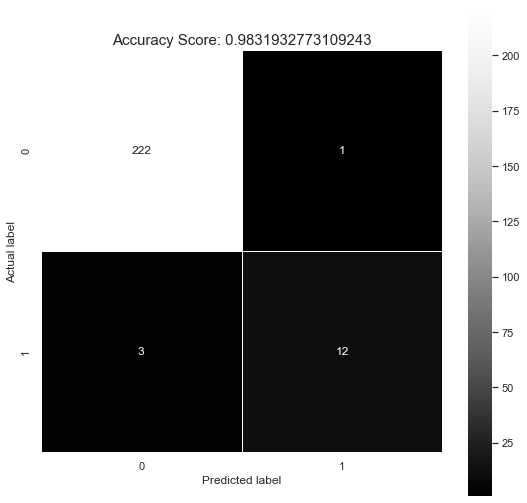

In [72]:
logr2 = logr.fit(x_train, y_train)

# Evaluating Performance
score = logr1.score(x_test, y_test)
print("Accuracy Score: ", score)

pred = logr1.predict(x_test) # prediction on entire dataset
cm = metrics.confusion_matrix(y_test, pred) # confusion matrix

# Plot to visualize confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt = ".0f", linewidths=.5, square = True, cmap = 'Greys_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

The model performed very well with an accuracy of 98%, which makes me skeptical about this performance measure.

Looking at the confusion matrix at a glance, majority of the values are located on the top left which indicates that the target variable is imbalanced.

We can also calculate the metrics below to better understand our model's performance:

In [73]:
# Precision
precision = precision_score(y_test, pred, average='binary')
print('Precision: %.2f' % precision)

# Recall
recall = recall_score(y_test, pred, average='binary')
print('Recall: %.3f' % recall)

# F1 Score
f1 = f1_score(y_test, pred, average='binary')
print('F1 Score: %.3f' % f1)

# ROC
fpr, tpr, thresholds = roc_curve(y_test, pred)
print('False Positive Rate: %.3f' % fpr[1])
print('True Positive Rate: %.3f' % tpr[1])
#print('Threshold: %.3f' % thresholds[0])


Precision: 0.92
Recall: 0.800
F1 Score: 0.857
False Positive Rate: 0.004
True Positive Rate: 0.800


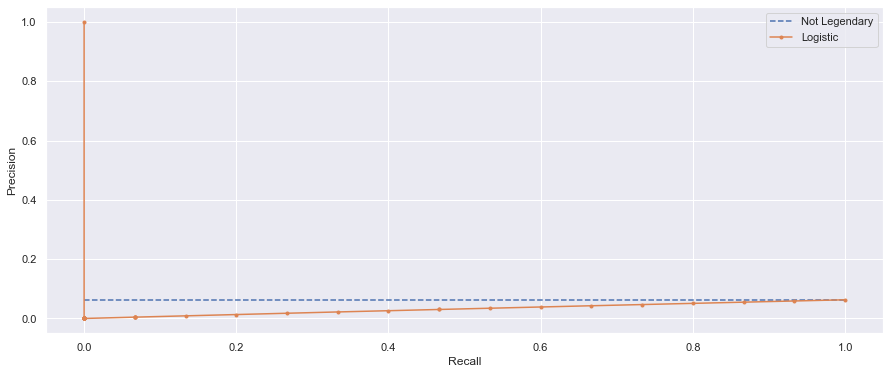

In [81]:
## Plotting the Precision-Recall Curve considering we are focused on Specificity (care about correctly classifying non-legendary Pokemon)
# Predicting the probability
log_pred = logr1.predict_proba(x_test)

# Only keeping probability of the negative values
log_prob = log_pred[:, 0]

# Calculating Classification scores to plot the curve (precision, recall, threshold)
prec, rec, _ = precision_recall_curve(y_test, log_prob)

# Plotting the precision-recall curves for better understanding
notLegend = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [notLegend, notLegend], linestyle='--', label='Not Legendary')
plt.plot(rec, prec, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [84]:
## Use this cell to check the results of confusion matrix
# Count values in isLegendary
counts = y_test.value_counts()
print(counts)

0    223
1     15
Name: isLegendary, dtype: int64


Based on the results above:
Pokemon that are not Legendary __SHOULD NOT__ be categorized as Legendary (just like Ratata). Otherwise, all the Pokemon trainers will waste their Master PokeBalls on common Pokemon, and will not be able to utilize the items for cooler Pokemon.

Since this model is to be used for Pokemon gamers or trainers, we are paying close attention to reducing the False Positives. This means that we are trying to prevent situations where a Pokemon that __SHOULD NOT__ be a legendary Pokemon is determined to be a legendary Pokemon, which will be detrimental to the trainers' item storage as previously mentioned.

Whereas, if the Pokemon that __SHOULD__ be a legendary Pokemon is classified as not legendary, then I would assume that players would have a less negative experience since they would be able to tell due to the lack of efficacy of all the weaker PokeBalls.

Considering the cases mentioned and that the classes are imbalanced, False Positive Rate seems to be the better performance measure to learn the rate of False Positives. And this model has achieved a 0.004 False Positive Rate, indicating that the model is near perfect, making it useful for character designers to determine whether a new Pokemon would be classified as Legendary based on their stats and characteristics.